# Spam Classification

### About Dataset
**WELFakeis a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.**

**Dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).**

**There are 72134 data entries in csv file.** 

In [1]:
import pandas as pd
df = pd.read_csv('WELFake_Dataset.csv')

In [2]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
df['title'][0]

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]'

In [6]:
df['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

### Data Preparation

In [7]:
df.shape

(72134, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [10]:
df= df.dropna()

In [11]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [12]:
# duplicate values
df.duplicated().sum()

8416

In [13]:
df.drop_duplicates(keep='first', inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
X = df['text']
X.reset_index()
X.index = range(len(X))
X

0        No comment is expected from Barack Obama Membe...
1         Now, most of the demonstrators gathered last ...
2        A dozen politically active pastors came here f...
3        The RS-28 Sarmat missile, dubbed Satan 2, will...
4        All we can say on this one is it s about time ...
                               ...                        
63116    An email released by WikiLeaks on Sunday appea...
63117    WASHINGTON (Reuters) - Hackers believed to be ...
63118    You know, because in fantasyland Republicans n...
63119    Migrants Refuse To Leave Train At Refugee Camp...
63120    MEXICO CITY (Reuters) - Donald Trump’s combati...
Name: text, Length: 63121, dtype: object

In [16]:
y= df['label']
y.reset_index()
y.index = range(len(y))
y

0        1
1        1
2        0
3        1
4        1
        ..
63116    1
63117    0
63118    1
63119    0
63120    0
Name: label, Length: 63121, dtype: int64

<Axes: xlabel='label', ylabel='count'>

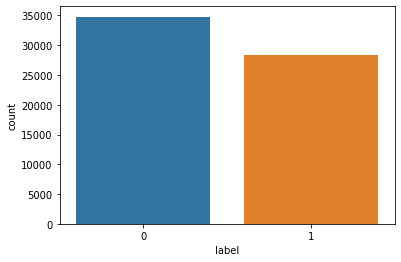

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="label")

In [18]:
import re 
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

In [19]:
def data_processing(text):
    text = text.lower()
    text = re.sub('[^A-Za-z]', ' ', text)
    text_tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_text = [w for w in text_tokens if not w in stop_words]
    stemmed_text = [ps.stem(w) for w in filtered_text]
    cleaned_text = " ".join(stemmed_text)
    return cleaned_text

In [20]:
X = X.apply(data_processing)

In [21]:
X[1]

'demonstr gather last night exercis constitut protect right peac protest order rais issu creat chang loretta lynch aka eric holder skirt'

## Data Preprocessing

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot

In [23]:
## One hot Representation 

voc_size = 5000

one_hot_rep = [one_hot(words,voc_size)for words in X]

In [24]:
X[1],one_hot_rep[1]

('demonstr gather last night exercis constitut protect right peac protest order rais issu creat chang loretta lynch aka eric holder skirt',
 [1358,
  4932,
  3026,
  3189,
  3943,
  3295,
  1646,
  2109,
  3589,
  4047,
  1702,
  249,
  3576,
  4227,
  4437,
  4678,
  2657,
  2974,
  26,
  2686,
  2515])

In [25]:
## Embedding representation
sent_length = 750

embedding_doc = pad_sequences(one_hot_rep,padding='post',maxlen=sent_length)

In [26]:
X[1],one_hot_rep[1],embedding_doc[1]

('demonstr gather last night exercis constitut protect right peac protest order rais issu creat chang loretta lynch aka eric holder skirt',
 [1358,
  4932,
  3026,
  3189,
  3943,
  3295,
  1646,
  2109,
  3589,
  4047,
  1702,
  249,
  3576,
  4227,
  4437,
  4678,
  2657,
  2974,
  26,
  2686,
  2515],
 array([1358, 4932, 3026, 3189, 3943, 3295, 1646, 2109, 3589, 4047, 1702,
         249, 3576, 4227, 4437, 4678, 2657, 2974,   26, 2686, 2515,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   

In [27]:
X_final = np.array(embedding_doc)
y_final = np.array(y)

In [28]:
X_final.shape,y_final.shape

((63121, 750), (63121,))

In [29]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_final,y_final,test_size=0.2,random_state=42)

In [30]:
X_train.shape,X_test.shape

((50496, 750), (12625, 750))

In [31]:
y_train.shape,y_test.shape

((50496,), (12625,))

In [32]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [33]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Model Building DL Model LSTM

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,  LSTM,Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
model_lstm = Sequential()
model_lstm.add(Embedding(voc_size,100,input_length = sent_length))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(1, activation = "sigmoid"))

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 750, 100)          500000    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 617377 (2.36 MB)
Trainable params: 617377 (2.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model_lstm.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [37]:
# Train the models with early stopping
early_stopping = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights=True)

In [38]:
model_lstm_history = model_lstm.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=100,callbacks=[early_stopping])

Epoch 1/5
505/505 [==============================] - 1050s 2s/step - loss: 0.6796 - accuracy: 0.5592 - val_loss: 0.6074 - val_accuracy: 0.7680
Epoch 2/5
505/505 [==============================] - 1066s 2s/step - loss: 0.5538 - accuracy: 0.6760 - val_loss: 0.2237 - val_accuracy: 0.9088
Epoch 3/5
505/505 [==============================] - 1040s 2s/step - loss: 0.1513 - accuracy: 0.9405 - val_loss: 0.1326 - val_accuracy: 0.9508
Epoch 4/5
505/505 [==============================] - 1142s 2s/step - loss: 0.0850 - accuracy: 0.9696 - val_loss: 0.1200 - val_accuracy: 0.9566
Epoch 5/5
505/505 [==============================] - 945s 2s/step - loss: 0.0566 - accuracy: 0.9809 - val_loss: 0.1222 - val_accuracy: 0.9575


In [39]:
model_lstm.evaluate(X_train, y_train)

1578/1578 [==============================] - 494s 313ms/step - loss: 0.0350 - accuracy: 0.9909


[0.03500267490744591, 0.9908705353736877]

In [40]:
model_lstm.evaluate(X_test, y_test)


395/395 [==============================] - 169s 428ms/step - loss: 0.1222 - accuracy: 0.9575


[0.12215831130743027, 0.9575445652008057]

In [41]:
## Prediction & Evaluation

y_pred = model_lstm.predict(X_test)
y_pred =np.where(y_pred > 0.5,1, 0)

395/395 [==============================] - 154s 385ms/step


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6955
           1       0.95      0.95      0.95      5670

    accuracy                           0.96     12625
   macro avg       0.96      0.96      0.96     12625
weighted avg       0.96      0.96      0.96     12625



In [44]:
score= accuracy_score(y_test,y_pred)
score

0.9575445544554455

In [45]:
print(confusion_matrix(y_test,y_pred))

[[6675  280]
 [ 256 5414]]


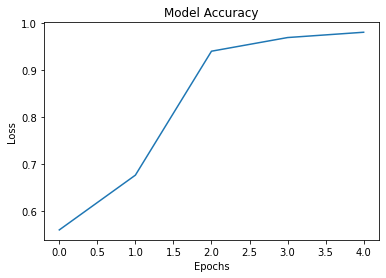

In [46]:
# plot summarize history for Accuracy
plt.plot(model_lstm_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

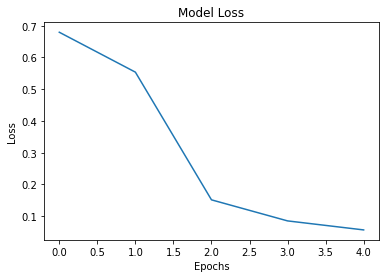

In [47]:
# plot summarize history for loss 

plt.plot(model_lstm_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

## Bidirectional LSTM

In [48]:
model_BLSTM =Sequential()
model_BLSTM.add(Embedding(voc_size,100,input_length = sent_length))
model_BLSTM.add(Bidirectional(LSTM(100)))
model_BLSTM.add(Dense(128, activation = "relu"))
model_BLSTM.add(Dropout(0.5))
model_BLSTM.add(Dense(1,activation='sigmoid'))
model_BLSTM.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
model_blstm_history=model_BLSTM.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=50,callbacks=[early_stopping])

Epoch 1/5
1010/1010 [==============================] - 1553s 2s/step - loss: 0.2647 - accuracy: 0.8858 - val_loss: 0.2530 - val_accuracy: 0.9010
Epoch 2/5
1010/1010 [==============================] - 1584s 2s/step - loss: 0.1887 - accuracy: 0.9259 - val_loss: 0.2184 - val_accuracy: 0.9153
Epoch 3/5
1010/1010 [==============================] - 1855s 2s/step - loss: 0.1711 - accuracy: 0.9325 - val_loss: 0.2187 - val_accuracy: 0.9134
Epoch 4/5
1010/1010 [==============================] - 1916s 2s/step - loss: 0.1375 - accuracy: 0.9469 - val_loss: 0.2665 - val_accuracy: 0.8991
Epoch 5/5
1010/1010 [==============================] - 1591s 2s/step - loss: 0.1277 - accuracy: 0.9511 - val_loss: 0.2171 - val_accuracy: 0.9171


In [50]:
model_BLSTM.evaluate(X_test, y_test)

395/395 [==============================] - 102s 259ms/step - loss: 0.2171 - accuracy: 0.9171


[0.2170993834733963, 0.9170693159103394]

In [51]:
## Prediction & Evaluation

y_pred = model_BLSTM.predict(X_test)
y_pred =np.where(y_pred > 0.5,1, 0)

395/395 [==============================] - 226s 534ms/step


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      6955
           1       0.88      0.94      0.91      5670

    accuracy                           0.92     12625
   macro avg       0.92      0.92      0.92     12625
weighted avg       0.92      0.92      0.92     12625



In [53]:
score= accuracy_score(y_test,y_pred)
score

0.9170693069306931

In [54]:
print(confusion_matrix(y_test,y_pred))

[[6257  698]
 [ 349 5321]]


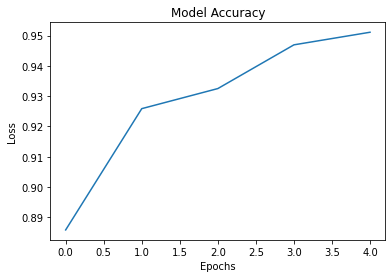

In [55]:
# plot summarize history for Accuracy
plt.plot(model_blstm_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

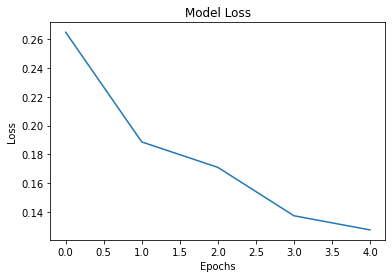

In [56]:
# plot summarize history for loss 

plt.plot(model_blstm_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()